# Inference: Population MCMC

This example shows you how to use [Population MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/population_mcmc.html), also known as simulated tempering.

It follows on from the [first sampling example](./first-example.ipynb).

First, we create a multi-modal distribution:

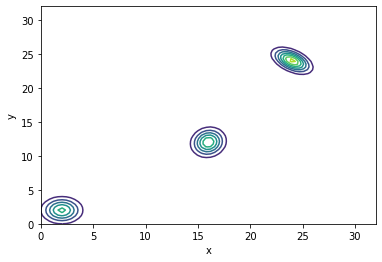

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a multi-modal logpdf
log_pdf = pints.toy.MultimodalGaussianLogPDF(
    [
        [2, 2],
        [16, 12],
        [24, 24],
    ],
    [
        [[1.2, 0.0], [0.0, 1.2]],
        [[0.8, 0.2], [0.2, 1.4]],
        [[1.0, -0.5], [-0.5, 1.0]],
    ]        
)
    
# Contour plot of pdf
x = np.linspace(0, 32, 80)
y = np.linspace(0, 32, 80)
X, Y = np.meshgrid(x, y)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exploration with adaptive MCMC

Now let's try exploring this landscape with adaptive covariance MCMC. In this example we use three chains, each started off near one of the modes.

Running...
Done!


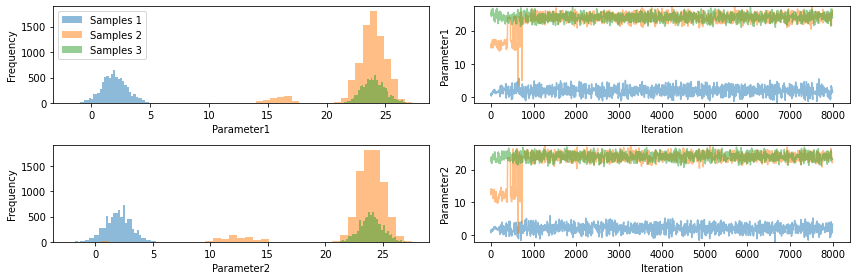

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
mean_x   16.64   10.43   0.35    2.74   23.28  24.27  25.80    10.99   1746.64  373.62
mean_y   16.69   10.44   0.43    2.78   23.35  24.34  25.84    11.12   1760.25  376.53


In [2]:
# Choose starting points for 3 mcmc chains
xs = [[1, 1], [15, 13], [25, 23]]

# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 3, xs, method=pints.HaarioBardenetACMC)

# Add stopping criterion
mcmc.set_max_iterations(8000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)
plt.show()

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(), parameter_names=['mean_x', 'mean_y'])
print(results)

In this run, each chain only explored its own mode! If you re-run, it can happen that one of the chains finds 2 or 3 modes, but the result shown above occurs quite often.

Now, we try and do the same thing with population MCMC:

Running...
Done!


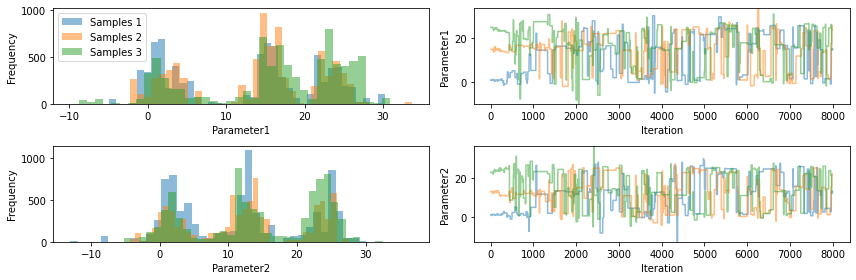

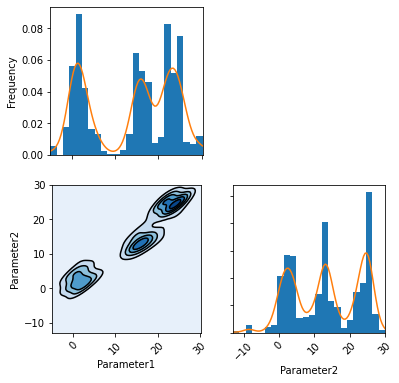

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -----  --------------
mean_x   14.04   9.27    -0.58   3.76   15.63  22.32  26.49    1.03    97.31  15.66
mean_y   12.95   9.35    -1.63   3.29   13.11  22.90  26.24    1.03    90.58  14.57


In [3]:
# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 3, xs, method=pints.PopulationMCMC)

# Add stopping criterion
mcmc.set_max_iterations(8000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(), parameter_names=['mean_x', 'mean_y'])
print(results)